# Analysis of the rental data

Analysis of the rental data already downloded, parsed, and converted to csv. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
CITY_NAME = 'lausanne'

In [4]:
city_path = '../../rental_list/' + CITY_NAME + '/' 
all_rental_data_path = city_path + 'all_rental_data'
combined_data_path = all_rental_data_path + '/combined/rental_all.csv'
df = pd.read_csv(combined_data_path)

In [5]:
df.tail()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
1152,5104296,75.0,3.5,flat,"Avenue de Sévelin, 1004 Lausanne, VD",Location d’appartement neuf,NaN,None,en/d/flat-rent-\nlausanne/5104296?s=2&t=1&l=20...
1153,5125689,40.0,2.0,flat,"1012 Lausanne, VD",Appartement 2pièces à lausanne 1300.- charges ...,NaN,None,en/d/flat-rent-\nlausanne/5125689?s=2&t=1&l=20...
1154,5144165,NaN,1.0,studio,"Rue Caroline 2 - Enning 3, 1003 Lausanne, VD",Sous location à usage de bureau,NaN,None,en/d/studio-rent-\nlausanne/5144165?s=2&t=1&l=...
1155,5146045,106.0,3.5,flat,"1004 Lausanne, VD",Au centre ville,NaN,None,en/d/flat-rent-\nlausanne/5146045?s=2&t=1&l=20...
1156,5159698,28.0,1.0,studio,"1018 Lausanne, VD",Studio meublé à louer ecublens,NaN,None,en/d/studio-rent-\nlausanne/5159698?s=2&t=1&l=...


In [6]:
df['Id'].value_counts()[df['Id'].value_counts() > 1]

5170621    2
Name: Id, dtype: int64

## New useful features

In [7]:
# price per room and price per surface area
df['RentPerArea'] = df['Rent'] / df['SurfaceArea']
df['RentPerRoom'] = df['Rent'] / df['NumRooms']
df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']

## Outliers

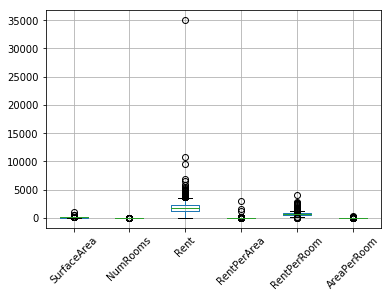

In [8]:
df.drop('Id', axis = 1).boxplot(rot = 45)

In [9]:
def get_whiskers(df, col, WHIS):
    des = df.describe()
    q1 = des[col]['25%']
    q3 = des[col]['75%']
    iqr = q3 - q1
    return [q1 - WHIS * iqr, q3 + WHIS * iqr]

**Surface Area outliers**

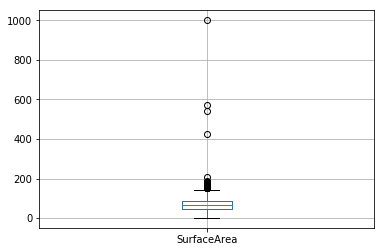

In [10]:
df[['SurfaceArea']].boxplot()

In [11]:
area_whiskers = get_whiskers(df, 'SurfaceArea', WHIS=3.5)  # WHIS value is adjusted based on the manual study of the outliers
area_whiskers

[-98.5, 229.5]

In [12]:
area_outliers = (df['SurfaceArea'] > area_whiskers[1]) | (df['SurfaceArea'] < area_whiskers[0])
area_outliers.sum() # how many area outliers?

4

In [13]:
df[area_outliers]

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
550,5138995,572.0,3.0,flat,"Chemin de Contigny 9, 1007 Lausanne, VD","Apartment a Lausanne (3 pieces, renove en 2016)",1560.0,None,en/d/flat-rent-\nlausanne/5138995?s=2&t=1&l=20...,2.727273,520.000000,190.666667
872,4984514,423.0,11.0,flat,"Chemin de Praz-Buchilly 103, 1000 Lausanne, VD",En bordure de Golf - Luxueux attique avec terr...,9500.0,None,en/d/flat-rent-\nlausanne/4984514?s=2&t=1&l=20...,22.458629,863.636364,38.454545
873,5141933,540.0,11.0,flat,"1000 Lausanne, VD",Superbe duplex de 11 pièces à louer !,10700.0,None,en/d/flat-rent-\nlausanne/5141933?s=2&t=1&l=20...,19.814815,972.727273,49.090909
918,5124217,1000.0,3.0,single-room,"foret 4b, 1018 Lausanne, VD",Colocation dans un 3 pieces Lausanne,1000.0,None,en/d/single-room-rent-\nlausanne/5124217?s=2&t...,1.000000,333.333333,333.333333


Looking at the above data, it looks like that we can capture the outliers by RentPerArea rather than area itself. 

**Rent per Area Outliers**:

In [14]:
rentPerArea_whiskers = get_whiskers(df, 'RentPerArea', WHIS=1.5)
rentPerArea_whiskers

[11.78816201397536, 45.53824849522625]

I adjust these values manually, as it seems that having a price greater than ~45 is not unusual for rooms for example. 

In [15]:
# manual adjustment
rentPerArea_whiskers = [15, 80]

In [16]:
rentPerArea_outliers = (df['RentPerArea'] > rentPerArea_whiskers[1]) | (df['RentPerArea'] < rentPerArea_whiskers[0])
print(rentPerArea_outliers.sum())
df[rentPerArea_outliers].head()

47


,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
15,5198531,129.0,NaN,flat,"1010 Lausanne, VD",Appartements de 1 à 4.5 pièces avec vues panor...,1190.0,NaN,/en/d/flat-rent-lausanne/5198531?s=2&t=1&l=202...,9.224806,NaN,NaN
16,5203441,81.0,3.0,flat,"Av. de Sévelin 10-12, 1004 Lausanne, VD","Appartement, 3.0 pièce(s)",1211.0,New,/en/d/flat-rent-s)»lausanne/5203441?s=2&t=1&l=...,14.950617,403.666667,27.000000
60,5197770,28.0,NaN,studio,"Chemin des Sauges 37, 1018 Lausanne, VDClose##...",Appartement subventionné - chemin des sauges 3...,381.0,## «Sous-location dans un cabinet médical à La...,/en/d/studio-rent-lausanne/5197770?s=2&t=1&l=2...,13.607143,NaN,NaN
61,5205846,50.0,1.5,flat,"1004 Lausanne, VD",Sous-location magnifique 1.5 lausanne centre,500.0,New,/en/d/flat-rent-lausanne/5205846?s=2&t=1&l=202...,10.000000,333.333333,33.333333
62,5196337,65.0,2.5,flat,"1005 Lausanne, VDClose### CHF 700.—Favourite##...",Chambre en colocationChambre meublée dans colo...,700.0,## «Chambre meublée dans coloc sympa»## «Chamb...,/en/d/flat-rent-lausanne/5196337?s=2&t=1&l=202...,10.769231,280.000000,26.000000


### What are the sources of outliers? 

The source of outliers here is mostely human mistake. Either numbers are entered in wrong fields or the price is for a week (from the description for example) or the price is for a room but total number of rooms is entered. Have a look at the examples below:

In [17]:
df['Description'][74]

'Grand et beau studio à Lausanne à remettre'

In [18]:
df['Description'][635]

'Appartement, 2.0 pièce(s)'

We will be removing the outliers, that appeared above; manually checking, most of them involve some sort of human error. We could make this removal of outliers more accurate, for instance by looking at the description field and looking for phrases such as "per room" or "per week" (in English or French, for example). 

### Remove outliers

In [19]:
# Remove Rent per Area outliers
df = df.drop(df[rentPerArea_outliers].index).reset_index()

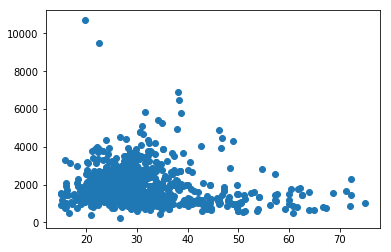

In [20]:
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [21]:
#df.drop((df[(df['RentPerArea'] > 2000)].index), axis = 0, inplace=True)

#df.reset_index(inplace=True)

## Some statistical info

In [22]:
stats = df.describe()
stats

,index,Id,SurfaceArea,NumRooms,Rent,RentPerArea,RentPerRoom,AreaPerRoom
count,1110.000000,1.110000e+03,971.000000,1052.000000,1098.000000,961.000000,1041.000000,919.000000
mean,582.092793,5.106700e+06,67.749743,2.761407,1872.777778,30.507933,746.057512,25.977758
std,333.897418,1.945417e+05,37.893260,1.220898,909.486230,9.119796,309.057941,10.974539
min,0.000000,1.806661e+06,8.000000,1.000000,1.000000,15.000000,0.500000,2.857143
25%,294.250000,5.114944e+06,45.000000,2.000000,1320.000000,25.172414,575.555556,21.333333
50%,585.500000,5.155358e+06,63.000000,2.500000,1690.000000,28.571429,667.600000,24.000000
75%,864.750000,5.182695e+06,85.000000,3.500000,2225.000000,33.108108,844.444444,27.666667
max,1156.000000,5.206122e+06,540.000000,11.000000,10700.000000,75.000000,3990.000000,180.000000


In [23]:
stats['Rent']['mean']

1872.7777777777778

In [24]:
stats.Rent

count     1098.000000
mean      1872.777778
std        909.486230
min          1.000000
25%       1320.000000
50%       1690.000000
75%       2225.000000
max      10700.000000
Name: Rent, dtype: float64

In [25]:
print("The mean rental price in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['Rent']['mean']))

The mean rental price in Lausanne is 1872.8 CHF per month.


In [26]:
print("The mean rental price per room in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerRoom']['mean']))

The mean rental price per room in Lausanne is 746.06 CHF per month.


In [27]:
print("The mean rental price per meter square in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerArea']['mean']))

The mean rental price per meter square in Lausanne is 30.508 CHF per month.


## Rent and Zip Code

### Extract Zip Code from Address

In [28]:
CITY_NAME_C = CITY_NAME.capitalize()

In [29]:
def Extract_zip_code(address):
    n = len(address)
    l = len("Lausanne, VD")
    return int(address[-l - 5: - l -1])

In [30]:
(df[df['Id'].index == 337]).index

Int64Index([337], dtype='int64')

In [31]:
for i in range(0, df.shape[0]):
    address = df['Address'][i]
    Extract_zip_code(address)

In [32]:
df['ZipCode'] = df['Address'].map(lambda x: Extract_zip_code(x))

In [249]:
df.head()

,index,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom,ZipCode
0,0,4695812,41.0,2.0,flat,"Av. de Cour 65, 1007 Lausanne, VD",Appartement de 2 pièces au 5ème étage,NaN,New,/en/d/flat-rent-lausanne/4695812?s=2&t=1&l=202...,NaN,NaN,20.500000,1007
1,1,5204125,21.0,1.5,studio,"Route Aloys-Fauquez 122, 1018 Lausanne, VD",Studio proche de toutes les commodités,970.0,New,/en/d/studio-rent-lausanne/5204125?s=2&t=1&l=2...,46.190476,646.666667,14.000000,1018
2,2,5201717,95.0,4.0,flat,"Av. de Morges 39, 1004 Lausanne, VD",Joli appartement - centre ville proche commodités,2085.0,NaN,/en/d/flat-rent-lausanne/5201717?s=2&t=1&l=202...,21.947368,521.250000,23.750000,1004
3,3,5201713,29.0,1.5,flat,"Ch. du Devin 57, 1012 Lausanne, VD","Quartier de Chailly, spacieux 1.5 pièce",910.0,NaN,/en/d/flat-rent-lausanne/5201713?s=2&t=1&l=202...,31.379310,606.666667,19.333333,1012
4,4,5195729,11.0,NaN,single-room,"Chemin de Montolivet 19, 1006 Lausanne, VD",1006 Lausanne - Montolivet 19 - Chambre meublé...,560.0,NaN,/en/d/single-room-rent-lausanne/5195729?s=2&t=...,50.909091,NaN,NaN,1006


In [251]:
tmp = df.head();

In [252]:
tmp.to_html('../data/sample_df.html')

In [34]:
zipVsRentMean = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom', 'SurfaceArea']]\
                .groupby(['ZipCode'], as_index = False).mean()

In [35]:
zipVsRentCount = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom']].groupby(['ZipCode'], as_index = False).count()

In [36]:
zipVsRentMean

,ZipCode,RentPerArea,RentPerRoom,AreaPerRoom,SurfaceArea
0,1000,28.458524,729.675634,25.975658,131.923077
1,1003,33.847367,956.716565,29.864104,77.057471
2,1004,29.348282,697.231981,25.349916,65.488971
3,1005,29.793665,718.242015,24.671657,73.903226
4,1006,32.542634,789.203604,26.219773,61.670213
5,1007,32.612209,774.724010,26.186800,59.460000
6,1010,28.715491,714.434524,26.260718,76.546512
7,1012,30.620128,789.353729,27.079760,69.865385
8,1015,23.448276,616.428571,24.857143,87.000000
9,1018,29.406521,668.998769,24.128802,57.859504


In [253]:
zipVsRentMean.to_html('../data/sample_zipVsRentMean.html')

In [37]:
import seaborn as sns

In [39]:
dftmp = df

In [41]:
dftmp = df[(df['ZipCode'] != 1000) & (df['ZipCode'] != 1015)]

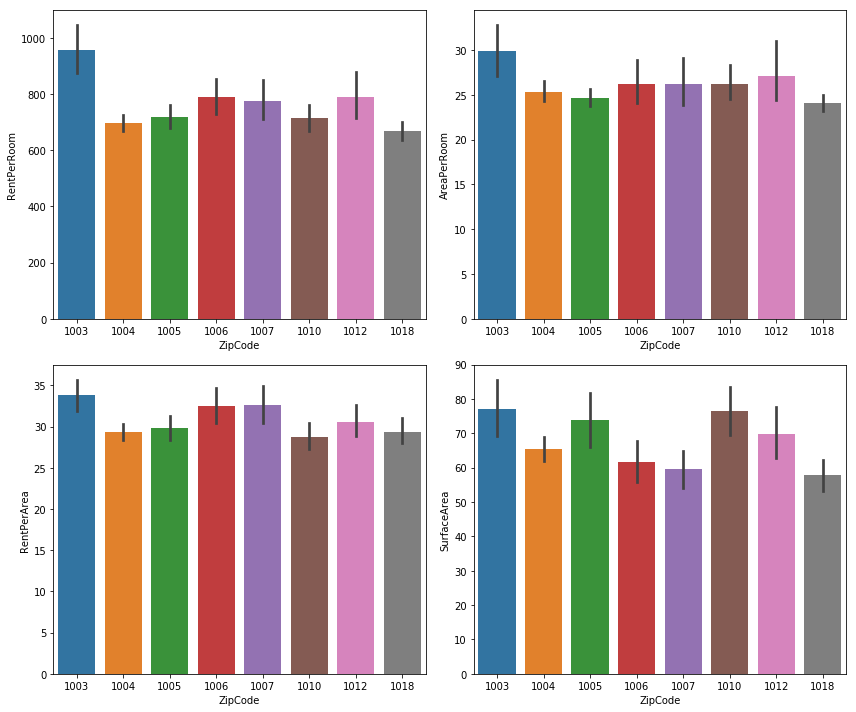

In [42]:
f, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'ZipCode', y = 'RentPerRoom', data = dftmp)
plt.subplot(2, 2, 2)
sns.barplot(x = 'ZipCode', y = 'AreaPerRoom', data = dftmp)
plt.subplot(2, 2, 3)
sns.barplot(x = 'ZipCode', y = 'RentPerArea', data = dftmp)
plt.subplot(2, 2, 4)
sns.barplot(x = 'ZipCode', y = 'SurfaceArea', data = dftmp)
plt.tight_layout()

## Showing the results on a map

### Getting the data
First download the zip code data from [Swiss opendata](https://opendata.swiss/en/dataset/amtliches-ortschaftenverzeichnis-mit-postleitzahl-und-perimeter). I have downloaded the PLZO_SHP_LV95 from [here](http://data.geo.admin.ch/ch.swisstopo-vd.ortschaftenverzeichnis_plz/PLZO_SHP_LV95.zip). 

### Import the data with Geopandas

In [43]:
import geopandas as gpd

In [44]:
gdf = gpd.read_file('../data/PLZO_SHP_LV95/PLZO_PLZ.shp')

In [45]:
gdf.head(2)

,UUID,OS_UUID,STATUS,INAEND,PLZ,ZUSZIFF,geometry
0,{0072F991-E46D-447E-A3BE-75467DB57FFC},{281807DC-9C0B-4364-9A55-0E8956876194},real,nein,3920,0,"POLYGON ((2610632.098999979 1092967.881011595,..."
1,{C3D3316F-1DFE-468E-BFC5-5C2308743B4C},{F065D58C-3F88-46EF-9AA0-DA0A96766333},real,nein,3864,0,"POLYGON ((2651834.365999961 1155253.396004515,..."


In [255]:
gdf.head(2).to_html('../data/sample_gdf.html')

### Conversion of coordinate reference system (crs)
I convert the CRS to a more common one. 

In [51]:
gdf.crs

{'init': 'epsg:2056'}

In [58]:
gdf= gdf.to_crs({'init': 'epsg:4326'})

### Plotting Lausanne Area

In [59]:
lausanne = [1000, 1003, 1004, 1005, 1006, 1007, 1010, 1010, 1012, 1015, 1018]

In [159]:
gdf_laus = gdf[gdf['PLZ'].isin(lausanne)]

In [160]:
gdf_laus.head(2)

,UUID,OS_UUID,STATUS,INAEND,PLZ,ZUSZIFF,geometry
1489,{6978BFC2-E77B-4B5A-BA97-8599B980EEE8},{16425D67-E2ED-49E4-96AF-B6EFF17BD36B},real,nein,1000,25,"POLYGON ((6.717990825892128 46.57256737666989,..."
2557,{080E42D7-DDA2-4C3C-AE33-1DB65A469E71},{75FE8838-F64A-4DC3-9B21-44D060E97A1A},real,nein,1007,0,"POLYGON ((6.623362316275361 46.5077236533493, ..."


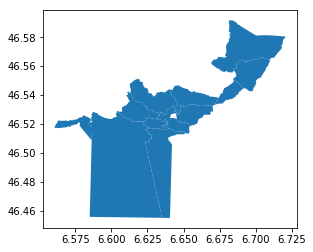

In [161]:
gdf_laus.plot()

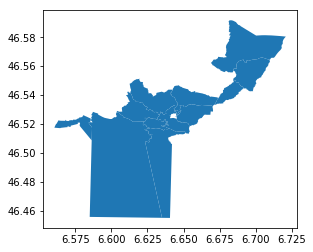

In [256]:
ax = gdf_laus.plot()

In [257]:
fig = ax.get_figure()

In [258]:
fig.savefig('../data/gdf_laus.jpg')

## Plotting Choropleth map with Altair
To plot nicer and interactive maps we use the [altair](https://github.com/hamedrazavi/altair_quick_tutorial) library. 

### Adding the rental data to the geopandas data frame

In [162]:
gdf_laus = gdf_laus.merge(zipVsRentMean, left_on='PLZ', right_on='ZipCode')

Longitude and latitude of the centroid of zip-code areas:

In [187]:
gdf_laus['x'] = gdf_laus['geometry'].centroid.x
gdf_laus['y'] = gdf_laus['geometry'].centroid.y

In [163]:
import altair as alt

Altair currently can only handle geojson or topjson maps. So, first we need to convert the geopandas data to appropriate data readable by altair.

In [164]:
import json

In [189]:
json_laus = json.loads(gdf_laus.to_json())

In [190]:
alt_laus = alt.Data(values = json_laus['features'])

In [240]:
alt_rentPerRoom = alt.Chart(alt_laus).mark_geoshape(
    stroke = 'white'
).encode(
    latitude = 'properties.y:Q',
    longitude = 'properties.x:Q',
    color = 'properties.RentPerRoom:Q'
).properties(
    width = 400,
    height = 500
)

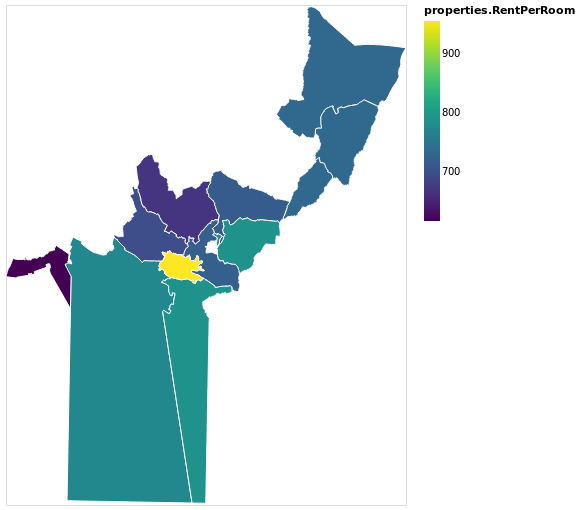

In [259]:
alt_rentPerRoom

In [241]:
text  = alt.Chart(alt_laus).mark_text(
        
).encode(
    longitude = 'properties.x:Q',
    latitude = 'properties.y:Q',
    text = 'properties.ZipCode:Q',
)

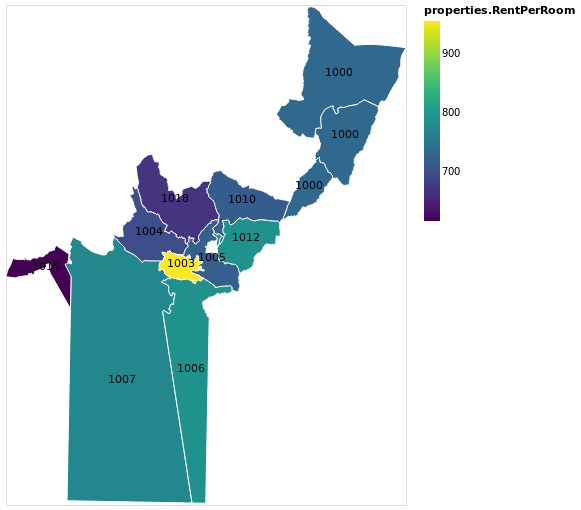

In [247]:
chart = alt_rentPerRoom + text
chart

In [248]:
chart.save('../data/lausanne_rent.html')